In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer
from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from ipywidgets import interact
import ipywidgets as widgets
import seaborn as sns

In [2]:
df = pd.read_csv("D:\Data Science\Course 10\DS2_C6_S5_Insurance_Data_Challenge.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Task 2

### a. How smoking habit is distributed into features of policyholders?

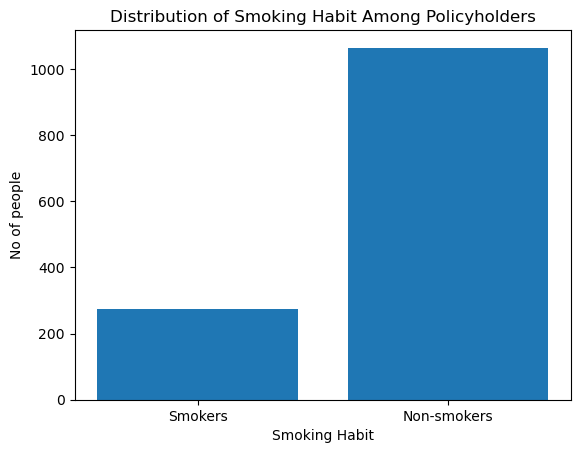

In [6]:
# Calculate the frequency of smokers and non-smokers
smokers = df[df['smoker'] == 'yes']
non_smokers = df[df['smoker'] == 'no']
smoker_counts = [len(smokers), len(non_smokers)]
smoker_labels = ['Smokers', 'Non-smokers']

# Create a bar chart
fig, ax = plt.subplots()
ax.bar(smoker_labels, smoker_counts)

# Add labels and a title
ax.set_xlabel('Smoking Habit')
ax.set_ylabel('No of people')
ax.set_title('Distribution of Smoking Habit Among Policyholders')

# Show the plot
plt.show()

### How does obesity exist among smokers 

Text(0.5, 1.0, 'Obesity Rates Among Smokers ')

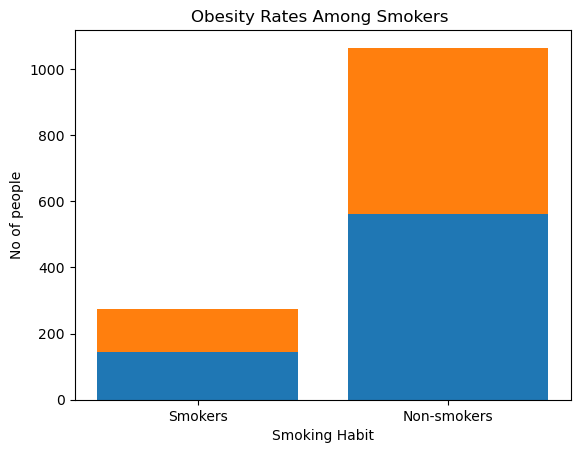

In [7]:
smokers = df[df['smoker'] == 'yes']
non_smokers = df[df['smoker'] == 'no']
obese_smokers = smokers[smokers['bmi'] >= 30]
obese_non_smokers = non_smokers[non_smokers['bmi'] >= 30]
obesity_rates = [len(obese_smokers) / len(smokers), len(obese_non_smokers) / len(non_smokers)]

# Create a grouped bar chart
fig, ax = plt.subplots()
x = ['Smokers', 'Non-smokers']
bar1 = ax.bar(x, [len(obese_smokers), len(obese_non_smokers)], label='Obese')
bar2 = ax.bar(x, [len(smokers)-len(obese_smokers), len(non_smokers)-len(obese_non_smokers)], bottom=[len(obese_smokers), len(obese_non_smokers)], label='Not Obese')

ax.set_xlabel('Smoking Habit')
ax.set_ylabel('No of people')
ax.set_title('Obesity Rates Among Smokers ')


### How do chaarges are distributed among region?

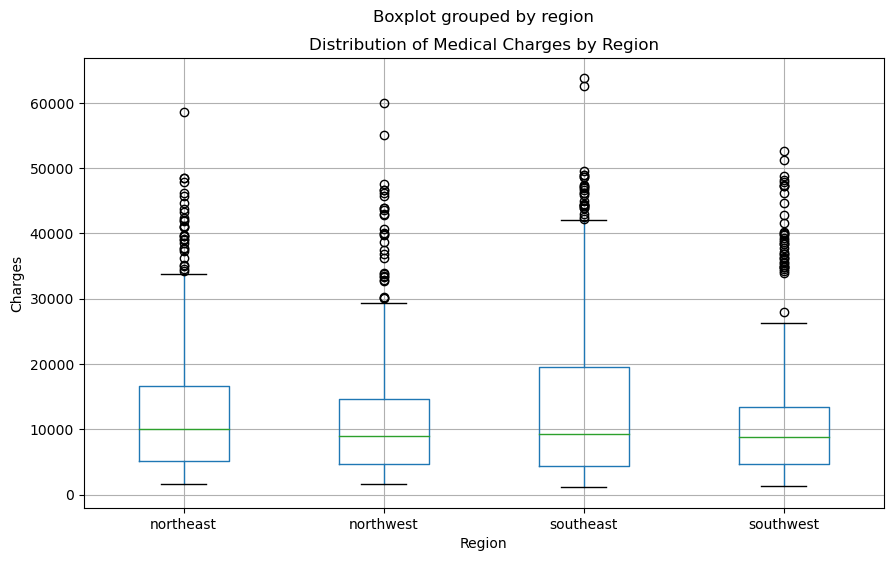

In [9]:
# Create a box plot of charges by region
ax=df.boxplot(column='charges', by='region', figsize=(10,6))
ax.set_xticklabels(["northeast", "northwest","southeast", "southwest"])

# Add labels and a title
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Distribution of Medical Charges by Region')

# Show the plot
plt.show()


### d. How do charges are distributed among gender? 

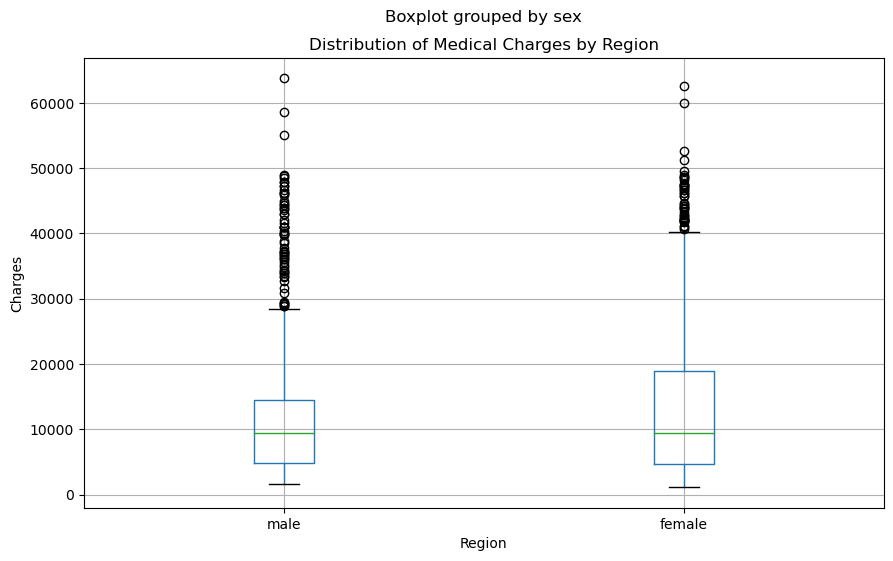

In [10]:
# Create a box plot of charges by regiondo 

ax=df.boxplot(column='charges', by='sex', figsize=(10,6))
ax.set_xticklabels(["male", "female"])
# Add labels and a title
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Distribution of Medical Charges by Region')

# Show the plot
plt.show()


# Task 3

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["sex"]=le.fit_transform(df["sex"])
df["smoker"]=le.fit_transform(df["smoker"])
df["region"]=le.fit_transform(df["region"])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [13]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
x=scale.fit_transform(df)

In [17]:
y = df.iloc[:,-1] 

In [36]:
X = df.drop("charges", axis =1)

In [37]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [39]:
cols = ["age","sex","bmi","children","smoker","region"]
def make_kmeans(attributes=cols, scaler=MinMaxScaler(), dimension_reduction='pca', components=2, k=3, show='features'):
 attributes = list(attributes)
 scaled_values = scaler.fit_transform(X[attributes])
 X_l=X.iloc[:, 0:3].values
 y_l=X.iloc[:, 3].values
 
 components = min(components, len(attributes))
 if dimension_reduction == 'pca':
    values = PCA().fit_transform(scaled_values)[:, :components]
 elif dimension_reduction == 'lda':
    values = LinearDiscriminantAnalysis(n_components=2).fit_transform(X_l,y_l)[:, :components] 
 else: 
    values = scaled_values
 
 cluster = KMeans(n_clusters=k).fit_predict(values)
 
 if show == 'features':
        df_plot = X.astype(float).copy()
 elif show == 'values':
    df_plot = pd.DataFrame(values)
 
 df_plot['cluster'] = cluster
 
 sns.pairplot(df_plot, hue="cluster", diag_kind = 'hist', diag_kws={'alpha':0.5} , vars=[c for c in df_plot.columns if c != 'cluster'])

style = {'description_width': '150px'}
layout = widgets.Layout(width='400px')
i = interact(make_kmeans
    , attributes=widgets.SelectMultiple(options=cols, value=cols, rows=len(cols)
     ,description='Features', layout=layout, style=style
     ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
             
     , scaler=widgets.RadioButtons(options=[ ('Z-Transform', StandardScaler()), ('Min-Max', MinMaxScaler()), ('None', FunctionTransformer(validate=False))]
     ,description='Scaler', layout=layout, style=style
     ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
             
     , dimension_reduction=widgets.RadioButtons(options=[('PCA', 'pca'), ('LDA', 'lda'), ('without', None)]
     ,description='Dimensionality Reduction'
     , layout=layout, style=style
     ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
             
     , components=widgets.SelectionSlider(options=range(1, 5), value=4
     ,description='PCA components'
     , layout=layout, style=style
     ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
             
     , k=widgets.SelectionSlider(options=range(2, 8),description='k'
     , layout=layout, style=style
     ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
             
     , show=widgets.RadioButtons(options=[('Features', 'features'), ('Values', 'values')],description='Show'
     , layout=layout, style=style,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
 )


interactive(children=(SelectMultiple(description='Features', index=(0, 1, 2, 3, 4, 5), layout=Layout(width='40…

# Using DBSCAN Clustering Algorithm

In [40]:
cols = ["age","sex","bmi","children","smoker","region"]
def make_dbscan(attributes=cols, scaler=MinMaxScaler(), dimension_reduction=None, components=5, eps=.5,
min_samples=5, show='features'):
    attributes = list(attributes)
    scaled_values = scaler.fit_transform(X[attributes])
    X_l=X.iloc[:, 0:3].values
    y_l=X.iloc[:, 3].values
    components = min(components, len(attributes))
    if dimension_reduction == 'pca':
        values = PCA().fit_transform(scaled_values)[:, :components]
    elif dimension_reduction == 'tsne':
        values = LinearDiscriminantAnalysis(n_components=2).fit_transform(X_l,y_l)[:, :components]
    else:
        values = scaled_values
 
    cluster = DBSCAN(eps=eps, min_samples=min_samples).fit_predict(values)
    print('Found', 1+np.max(cluster), 'clusters with', np.sum(cluster == -1), 'outliers')
 
    if show == 'features':
        df_plot = X.astype(float).copy()
    elif show == 'values':
        df_plot = pd.DataFrame(values)
 
    df_plot['cluster'] = cluster
 
    sns.pairplot(df_plot, hue="cluster", diag_kind = 'hist', diag_kws={'alpha':0.5}, vars=[c for c in df_plot.columns if c != 'cluster'])

style = {'description_width': '150px'}
layout = widgets.Layout(width='400px')

i = interact(make_dbscan
 , attributes=widgets.SelectMultiple(options=cols, value=cols, rows=len(cols)
 ,description='Features', layout=layout, style=style
 ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
             
 , scaler=widgets.RadioButtons(options=[('Z-Transform', StandardScaler()), ('Min-Max', MinMaxScaler()), ('None', FunctionTransformer(validate=False))]
 ,description='Scaler', layout=layout, style=style
 ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
             
 , dimension_reduction=widgets.RadioButtons(options=[('PCA', 'pca'), ('LDA', 'lda'), ('without', None)]
 ,description='Dimensionality Reduction'
 , layout=layout, style=style
 ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
             
 , components=widgets.SelectionSlider(options=range(1, 5), value=4
 ,description='Number components'
 , layout=layout, style=style
 ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
                                      
 , eps=widgets.SelectionSlider(options=[.1, .25, .5, .6, .7, .8, .9, 1., 1.25, 1.5, 2.], value = .5
 ,description='Epsilon'
 , layout=layout, style=style
 ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
                               
 , min_samples=widgets.SelectionSlider(options=range(1, 20), value=5
 ,description='Min. samples'
 , layout=layout, style=style
 ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
                                       
 , show=widgets.RadioButtons(options=[('Features', 'features'), ('Values', 'values')]
 ,description='Show'
 , layout=layout, style=style
 ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
 )

interactive(children=(SelectMultiple(description='Features', index=(0, 1, 2, 3, 4, 5), layout=Layout(width='40…

### Hierarchical Clustering

In [41]:
from sklearn.cluster import AgglomerativeClustering
cols = ["age","sex","bmi","children","smoker","region"]

def make_agg_clustering(attributes=cols, scaler=MinMaxScaler(), dimension_reduction=None, components=5, n_clusters=3, linkage='ward', show='features'):
    attributes = list(attributes)
    scaled_values = scaler.fit_transform(X[attributes])
    X_l=X.iloc[:, 0:3].values
    y_l=X.iloc[:, 3].values
    components = min(components, len(attributes))
    if dimension_reduction == 'pca':
        values = PCA().fit_transform(scaled_values)[:, :components]
    elif dimension_reduction == 'tsne':
        values = LinearDiscriminantAnalysis(n_components=2).fit_transform(X_l,y_l)[:, :components]
    else:
        values = scaled_values
 
    cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage).fit_predict(values)
    print('Found', np.unique(cluster).size, 'clusters')
 
    if show == 'features':
        df_plot = X.astype(float).copy()
    elif show == 'values':
        df_plot = pd.DataFrame(values)
 
    df_plot['cluster'] = cluster
 
    sns.pairplot(df_plot, hue="cluster", diag_kind='hist', diag_kws={'alpha':0.5}, vars=[c for c in df_plot.columns if c != 'cluster'])

style = {'description_width': '150px'}
layout = widgets.Layout(width='400px')

i = interact(make_agg_clustering
 , attributes=widgets.SelectMultiple(options=cols, value=cols, rows=len(cols)
 ,description='Features', layout=layout, style=style
 ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
             
 , scaler=widgets.RadioButtons(options=[('Z-Transform', StandardScaler()), ('Min-Max', MinMaxScaler()), ('None', FunctionTransformer(validate=False))]
 ,description='Scaler', layout=layout, style=style
 ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
             
 , dimension_reduction=widgets.RadioButtons(options=[('PCA', 'pca'), ('LDA', 'lda'), ('without', None)]
 ,description='Dimensionality Reduction'
 , layout=layout, style=style
 ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
             
 , components=widgets.SelectionSlider(options=range(1, 5), value=4
 ,description='Number components'
 , layout=layout, style=style
 ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
                                      
 , n_clusters=widgets.SelectionSlider(options=range(2, 8), value=3
 ,description='Number of Clusters'
 , layout=layout, style=style
 ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
                               
 , linkage=widgets.RadioButtons(options=['ward', 'complete', 'average'])
 ,description='Linkage Type'
 , layout=layout, style=style
 ,disabled=False,continuous_update=False,orientation='horizontal',readout=True

 , show=widgets.RadioButtons(options=[('Features', 'features'), ('Values', 'values')]
 ,description='Show'
 , layout=layout, style=style
 ,disabled=False,continuous_update=False,orientation='horizontal',readout=True) 
 )

interactive(children=(SelectMultiple(description='Features', index=(0, 1, 2, 3, 4, 5), layout=Layout(width='40…